In [ ]:
!pip install kaggle

In [ ]:
#config the path of the kaggle.json

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the zip file

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the packages**

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1705.jpg', 'with_mask_3039.jpg', 'with_mask_1363.jpg', 'with_mask_461.jpg', 'with_mask_820.jpg']
['with_mask_1186.jpg', 'with_mask_70.jpg', 'with_mask_1238.jpg', 'with_mask_2548.jpg', 'with_mask_2998.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1178.jpg', 'without_mask_55.jpg', 'without_mask_2163.jpg', 'without_mask_2136.jpg', 'without_mask_492.jpg']
['without_mask_2917.jpg', 'without_mask_3649.jpg', 'without_mask_2457.jpg', 'without_mask_1803.jpg', 'without_mask_1393.jpg']


In [ ]:
print("No of images with mask",len(with_mask_files))
print("No of images without mask",len(without_mask_files))

No of images with mask 3725
No of images without mask 3828


**Creating the labels**

with mask --->1
without mask ----->0

In [ ]:
# creating the labels

with_mask_labels = [1]*3725
without_mask_labels  = [0]*3828

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

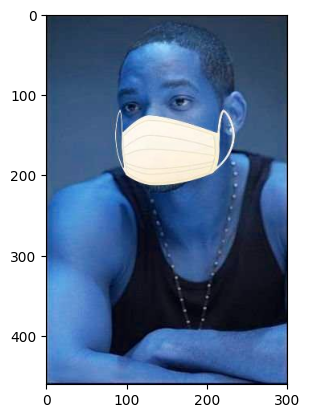

In [ ]:
# with masks

img = cv2.imread('/content/data/with_mask/with_mask_1238.jpg')
img = plt.imshow(img)
plt.show()

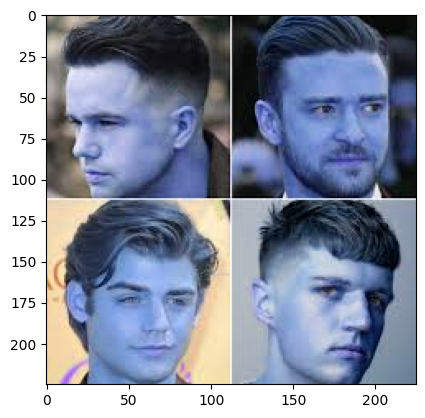

In [ ]:
img = cv2.imread('/content/data/without_mask/without_mask_2457.jpg')
img = plt.imshow(img)
plt.show()

Image processing

Resize the images

convert into numpy array

In [ ]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data = []

#preprocess for with mask images
for img_file in with_mask_files:
  img = Image.open(with_mask_path+img_file)
  img = img.resize((128,128))
  img  = img.convert('RGB')
  img = np.array(img)
  data.append(img)

#preprocess for without mask images
for img_file in without_mask_files:
  img = Image.open(without_mask_path+img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))

7553


In [ ]:
print(data[0])

[[[179 185 181]
  [188 193 189]
  [191 194 189]
  ...
  [249 247 236]
  [245 244 237]
  [244 244 238]]

 [[176 182 178]
  [189 194 190]
  [197 200 195]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[176 181 177]
  [195 200 196]
  [204 207 202]
  ...
  [208 204 206]
  [202 200 199]
  [203 202 201]]

 ...

 [[251 240 248]
  [253 241 244]
  [255 229 230]
  ...
  [222 220 222]
  [220 218 221]
  [223 221 223]]

 [[252 241 249]
  [251 235 240]
  [253 228 230]
  ...
  [221 216 222]
  [221 215 222]
  [221 216 222]]

 [[254 242 250]
  [248 232 237]
  [248 225 226]
  ...
  [220 215 223]
  [218 213 219]
  [218 213 219]]]


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data)

list

In [ ]:
# converting the data list and labels list into numpy array

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
Y.shape

(7553,)

**Spliting the data into train and test**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(7553,) (6042,) (1511,)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 254 253]
  [253 252 252]
  ...
  [ 98 111 128]
  [101 110 130]
  [101 109 129]]

 [[255 254 255]
  [255 254 255]
  [254 254 254]
  ...
  [ 95 107 123]
  [100 110 129]
  [101 109 129]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 92 106 119]
  [ 97 110 127]
  [ 98 109 127]]]


In [ ]:
print(X_train_scaled[1])

[[[0.76862745 0.76862745 0.81568627]
  [0.76862745 0.76862745 0.81568627]
  [0.77254902 0.77254902 0.81960784]
  ...
  [0.36078431 0.36470588 0.38431373]
  [0.4        0.40392157 0.42745098]
  [0.43137255 0.43529412 0.45490196]]

 [[0.77254902 0.77254902 0.81960784]
  [0.77254902 0.77254902 0.81960784]
  [0.77254902 0.77254902 0.81960784]
  ...
  [0.19215686 0.19215686 0.22352941]
  [0.18823529 0.18823529 0.21960784]
  [0.18039216 0.18039216 0.21176471]]

 [[0.77647059 0.77647059 0.82352941]
  [0.77647059 0.77647059 0.82352941]
  [0.77647059 0.77647059 0.82352941]
  ...
  [0.16862745 0.16862745 0.20392157]
  [0.17647059 0.17647059 0.20784314]
  [0.17647059 0.17647059 0.20784314]]

 ...

 [[0.09411765 0.09803922 0.11764706]
  [0.10196078 0.10588235 0.1254902 ]
  [0.09019608 0.09411765 0.11372549]
  ...
  [0.09803922 0.10196078 0.12156863]
  [0.09803922 0.10196078 0.12156863]
  [0.09803922 0.10196078 0.12156863]]

 [[0.09803922 0.10196078 0.12156863]
  [0.10196078 0.10588235 0.1254902 ]


**Building the Convolution Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#complile the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
# training the neural network

history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9410 - loss: 0.1569 - val_accuracy: 0.9289 - val_loss: 0.2374
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9513 - loss: 0.1213 - val_accuracy: 0.9207 - val_loss: 0.2800
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9537 - loss: 0.1210 - val_accuracy: 0.9107 - val_loss: 0.3334
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9611 - loss: 0.0940 - val_accuracy: 0.9355 - val_loss: 0.2947
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9715 - loss: 0.0736 - val_accuracy: 0.9322 - val_loss: 0.2664


Model Evaluation


In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("Accuracy: ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9371 - loss: 0.2348
Accuracy:  0.9404367804527283


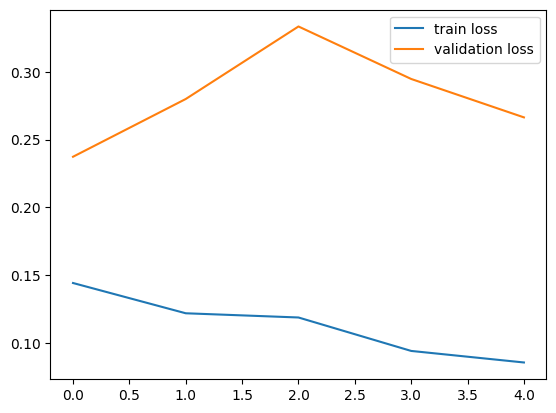

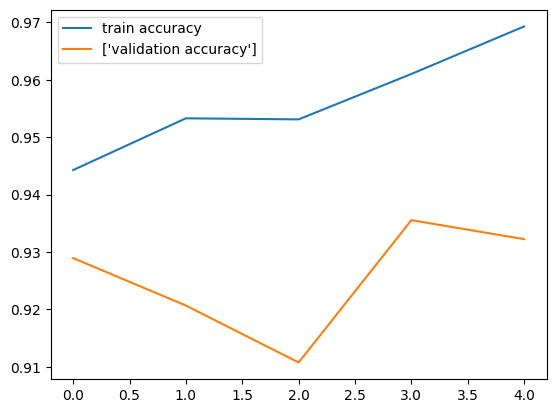

In [ ]:
h = history

# ploting the loss values

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# ploting the accuracy values

plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label=['validation accuracy'])
plt.legend()
plt.show()

**Predictive System**

Enter the image path: /content/test2.jpg


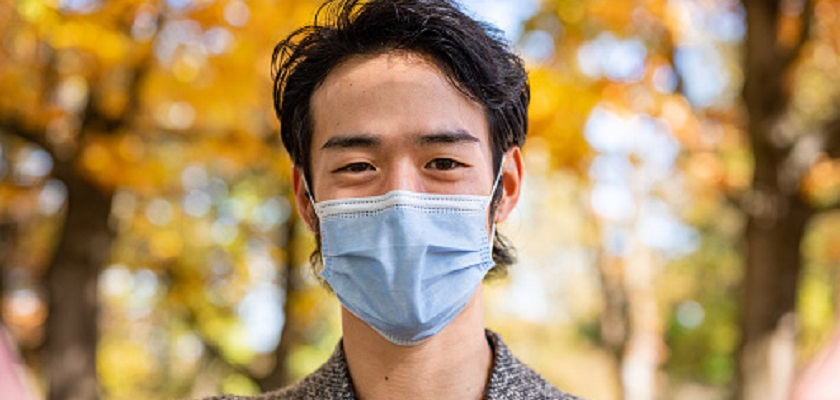

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.38737425 0.47700003]]
The person with mask


In [ ]:
input_image_path = input("Enter the image path: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
if input_pred_label ==1:
  print("The person with mask")
else:
  print("The person without mask")

Enter the image path: /content/without_mask_1008.jpg


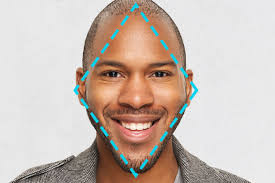

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.00943263 0.82309055]]
1
The person with mask


In [ ]:
input_image_path = input("Enter the image path: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label ==1:
  print("The person with mask")
else:
  print("The person without mask")